# 9. Pythonでスペクトログラム

## サンプルコード

/var/folders/sm/c11y22r13sq18bx2mh1ht9b00000gn/T/ipykernel_27997/119689647.py:11: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(np.abs(fftshift(amp / abs(amp).max())))


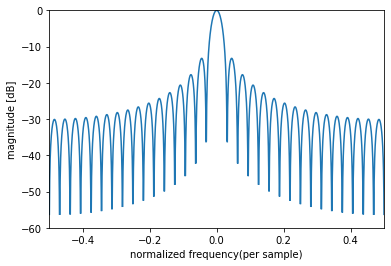

In [58]:
# 9.1
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft, fftshift

N = 2 ** 5
wave = signal.boxcar(N)
amp = 2.0 * fft(wave, 2048) / N
freq = np.linspace(-0.5, 0.5, len(amp))
magnitude = 20 * np.log10(np.abs(fftshift(amp / abs(amp).max())))

plt.plot(freq, magnitude)
plt.axis([-0.5, 0.5, -60, 0])
plt.ylabel("magnitude [dB]")
plt.xlabel("normalized frequency(per sample)")
plt.show()


/var/folders/sm/c11y22r13sq18bx2mh1ht9b00000gn/T/ipykernel_27997/729737097.py:11: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(np.abs(fftshift(amp / abs(amp).max())))


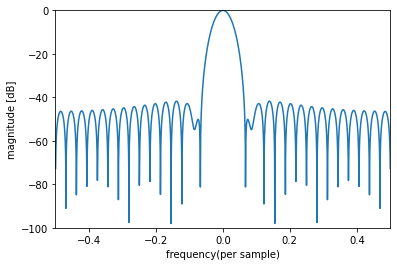

In [59]:
# 9.2
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

N = 2 ** 5
w_hamming = signal.hamming(N)
amp = 2.0 * fft(w_hamming, 2048) / N
freq = np.linspace(-0.5, 0.5, len(amp))
magnitude = 20 * np.log10(np.abs(fftshift(amp / abs(amp).max())))

plt.plot(freq, magnitude)
plt.axis([-0.5, 0.5, -100, 0])
plt.ylabel("magnitude [dB]")
plt.xlabel("frequency(per sample)")
plt.show()


In [60]:
# 9.3
from scipy.optimize import newton
import numpy as np

PI = np.pi

def s(x):
    return np.sqrt(2) * np.sin(x) - x

init_root = 1.5
print(2.0 * newton(s, init_root) / PI)

0.8858929413789284


/var/folders/sm/c11y22r13sq18bx2mh1ht9b00000gn/T/ipykernel_27997/3247608564.py:11: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(np.abs(fftshift(amp / abs(amp).max())))


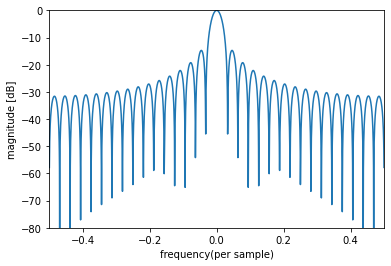

In [61]:
# 9.4
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

N = 2**5
w_kaiser = signal.kaiser(N, beta = 1)
amp = 2.0*fft(w_kaiser, 2048) / N
freq = np.linspace(-0.5, 0.5, len(amp))
magnitude = 20 * np.log10(np.abs(fftshift(amp / abs(amp).max())))

plt.plot(freq, magnitude)
plt.axis([-0.5, 0.5, -80, 0])
plt.ylabel("magnitude [dB]")
plt.xlabel("frequency(per sample)")
plt.show()


    channels=2
    sample_width=2
    sampling_rate=44100
    number_of_frames=492037
    length_of_wavfile=11.16
    


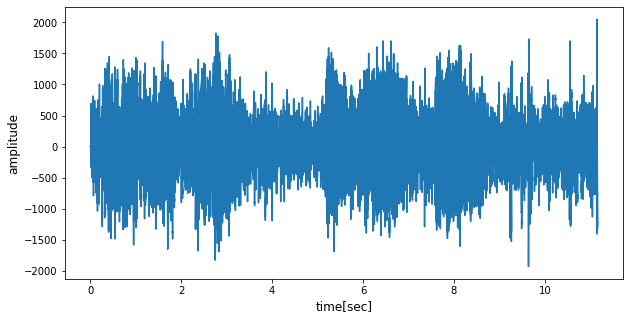

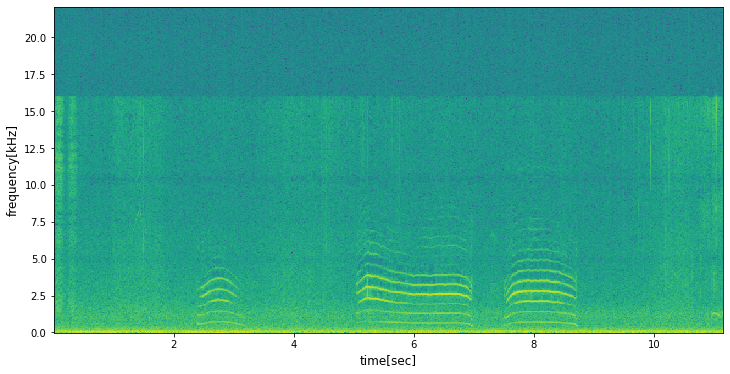

In [62]:
# 9.5
import os
import numpy as np
from scipy import signal
from scipy.io import wavfile
import wave
import matplotlib.pyplot as plt


def wave_analyzer(filename):
    """
    getting information of the specified wav-file
    """
    path = os.getcwd()  # current working directory
    fp = path + "/" + filename
    wavefile = wave.open(fp, "rb")
    rate, voice = wavfile.read(fp)
    channels = wavefile.getnchannels()  # channel
    sample_width = wavefile.getsampwidth()  # sample width[byte]
    sampling_rate = wavefile.getframerate()  # sampling rate(frequency)
    number_of_frames = wavefile.getnframes()  # number of frames
    if channels == 2:  # stereophonic case
        voice = np.mean(voice, axis=1)
    N = voice.shape[0]
    length_of_wavfile = N / rate  # length of wav file [sec]
    print(
        f"""
    {channels=}
    {sample_width=}
    {sampling_rate=}
    {number_of_frames=}
    {length_of_wavfile=:.2f}
    """
    )

    # drawing audio waveform
    _, ax = plt.subplots(figsize=(10, 5))
    ax.plot(np.arange(N) / rate, voice)
    ax.set_xlabel("time[sec]", fontsize=12)
    ax.set_ylabel("amplitude", fontsize=12)

    # drawing spectrogram
    winlength = 2 ** 10
    freqs, times, Sx = signal.spectrogram(
        voice,
        fs=rate,
        window="hamming",
        nperseg=winlength,
        detrend=False,
        scaling="spectrum",
    )
    # to avoid RuntimeWarning: divide by zero encountered in log10
    Sx[Sx == 0] = np.finfo(float).eps
    _, ax = plt.subplots(figsize=(12, 6))
    ax.pcolormesh(
        times, freqs / 1000, 10 * np.log10(Sx), cmap="viridis", shading="auto"
    )
    ax.set_ylabel("frequency[kHz]", fontsize=12)
    ax.set_xlabel("time[sec]", fontsize=12)
    wavefile.close()


wave_analyzer("Catmewling.wav")


## 章末問題

/var/folders/sm/c11y22r13sq18bx2mh1ht9b00000gn/T/ipykernel_27997/2750515670.py:10: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(np.abs(fftshift(amp/abs(amp).max())))


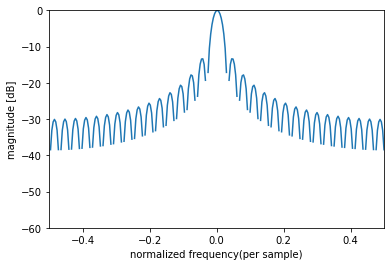

In [64]:
# 9.63
import numpy as np
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

N = 2 ** 8
wave = np.zeros(N)
wave[32:64] = 1 / (64 - 32)
amp = 2.0 * fft(wave) / N
freq = np.linspace(-0.5, 0.5, len(amp))
magnitude = 20 * np.log10(np.abs(fftshift(amp / abs(amp).max())))
plt.plot(freq, magnitude)
plt.axis([-0.5, 0.5, -60, 0])
plt.ylabel("magnitude [dB]")
plt.xlabel("normalized frequency(per sample)")
plt.show()


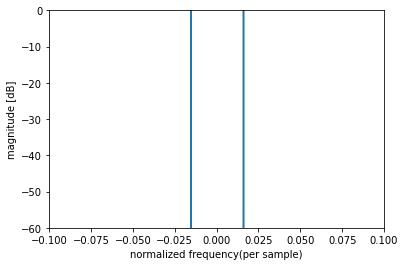

In [65]:
# 9.64
import numpy as np
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

N = 2 ** 8
PI = np.pi
freq = 20
t = np.arange(N)
wave = np.sin(freq * 2 * PI * t / N)
amp = 2.0 * fft(wave) / N
freq = np.linspace(-0.1, 0.1, len(amp))
magnitude = 20 * np.log10(np.abs(fftshift(amp / abs(amp).max())))
plt.plot(freq, magnitude)
plt.axis([-0.1, 0.1, -60, 0])
plt.ylabel("magnitude [dB]")
plt.xlabel("normalized frequency(per sample)")
plt.show()


/var/folders/sm/c11y22r13sq18bx2mh1ht9b00000gn/T/ipykernel_27997/1331969295.py:11: RuntimeWarning: divide by zero encountered in log10
  magnitude = 20 * np.log10(np.abs(fftshift(amp/ abs(amp).max())))


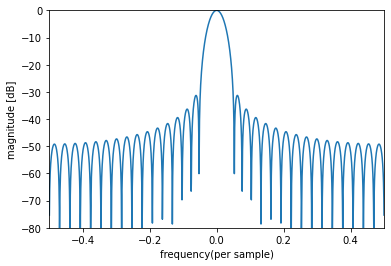

In [63]:
# 9.65
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

N = 2**5
w_kaiser = signal.kaiser(N, beta = 4.0109)
amp = 2.0 * fft(w_kaiser, 2048)/ N
freq = np.linspace(-0.5, 0.5, len(amp))
magnitude = 20 * np.log10(np.abs(fftshift(amp/ abs(amp).max())))

plt.plot(freq, magnitude)
plt.axis([-0.5, 0.5, -80, 0])
plt.ylabel("magnitude [dB]")
plt.xlabel("frequency(per sample)")
plt.show()